<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:


def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Инициализируем результирующий вектор нулями
    result = np.zeros((X[0].shape[0], 1))
    
    # Перемножаем каждую матрицу с соответствующим вектором и суммируем
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    
    return result

def test_sum_prod():
    # Тест 1: Простые матрицы и векторы
    X1 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V1 = [np.array([[1], [1]]), np.array([[1], [1]])]
    expected_result1 = np.array([[14], [22]])  # Исправлено: (1+2) + (5+6), (3+4) + (7+8)
    assert np.array_equal(sum_prod(X1, V1), expected_result1), "Test Case 1 Failed"

    # Тест 2: Негативные значения
    X2 = [np.array([[1, -2], [-3, 4]]), np.array([[5, -6], [-7, 8]])]
    V2 = [np.array([[1], [1]]), np.array([[1], [1]])]
    expected_result2 = np.array([[-2], [2]])  # Исправлено: (-1) + (-1), (1) + (1)
    assert np.array_equal(sum_prod(X2, V2), expected_result2), "Test Case 2 Failed"

    # Тест 3: Смешанные значения
    X3 = [np.array([[1, 2, 3], [4, 5, 6]]), np.array([[7, 8, 9], [10, 11, 12]])]
    V3 = [np.array([[1], [1], [1]]), np.array([[1], [1], [1]])]
    expected_result3 = np.array([[30], [48]])  # Исправлено: (6 + 24), (15 + 33)
    assert np.array_equal(sum_prod(X3, V3), expected_result3), "Test Case 3 Failed"

    print("Все тесты пройдены!")

# Запускаем тесты
test_sum_prod()





Все тесты пройдены!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [7]:


def binarize(M, threshold=0.5):
    """
    Бинаризует матрицу M по заданному порогу.
    
    Параметры:
    M : np.ndarray
        Входная матрица.
    threshold : float
        Порог для бинаризации.
        
    Возвращает:
    np.ndarray
        Бинаризованная матрица.
    """
    return (M > threshold).astype(int)

def test_binarize():
    # Тест 1: Простая матрица
    M1 = np.array([[0.1, 0.6], [0.4, 0.8]])
    expected_result1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(binarize(M1, 0.5), expected_result1), "Test Case 1 Failed"

    # Тест 2: Все элементы ниже порога
    M2 = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected_result2 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(binarize(M2, 0.5), expected_result2), "Test Case 2 Failed"

    # Тест 3: Все элементы выше порога
    M3 = np.array([[0.6, 0.7], [0.8, 0.9]])
    expected_result3 = np.array([[1, 1], [1, 1]])
    assert np.array_equal(binarize(M3, 0.5), expected_result3), "Test Case 3 Failed"



    print("Все тесты пройдены!")

# Запускаем тесты
test_binarize()


Все тесты пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [13]:


def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    if mat.size == 0:  # Проверка на пустую матрицу
        return []
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

def test_unique_functions():
    # Тест 1: Простая матрица
    mat1 = np.array([[1, 2, 2], 
                     [3, 4, 4], 
                     [1, 2, 3]])
    expected_unique_rows1 = [np.array([1, 2]), np.array([3, 4]), np.array([1, 2, 3])]
    expected_unique_columns1 = [np.array([1, 3]), np.array([2, 4]), np.array([2, 3, 4])]  # Исправлено здесь
    
    # Проверяем уникальные строки
    result_rows1 = unique_rows(mat1)
    assert all(np.array_equal(result_rows1[i], expected_unique_rows1[i]) for i in range(len(expected_unique_rows1))), "Test Case 1 Failed for unique_rows"

    # Проверяем уникальные столбцы
    result_columns1 = unique_columns(mat1)
    print("Результаты уникальных столбцов:", result_columns1)  # Выводим результаты для отладки
    print("Ожидаемые уникальные столбцы:", expected_unique_columns1)  # Выводим ожидаемые значения для отладки
    assert all(np.array_equal(result_columns1[i], expected_unique_columns1[i]) for i in range(len(expected_unique_columns1))), "Test Case 1 Failed for unique_columns"

    # Тест 2: Матрица с одинаковыми элементами
    mat2 = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]])
    expected_unique_rows2 = [np.array([1]), np.array([1]), np.array([1])]
    expected_unique_columns2 = [np.array([1]), np.array([1]), np.array([1])]
    
    result_rows2 = unique_rows(mat2)
    assert all(np.array_equal(result_rows2[i], expected_unique_rows2[i]) for i in range(len(expected_unique_rows2))), "Test Case 2 Failed for unique_rows"
    
    result_columns2 = unique_columns(mat2)
    assert all(np.array_equal(result_columns2[i], expected_unique_columns2[i]) for i in range(len(expected_unique_columns2))), "Test Case 2 Failed for unique_columns"

    # Тест 3: Пустая матрица
    mat3 = np.array([[], []])
    expected_unique_rows3 = [np.array([]), np.array([])]
    expected_unique_columns3 = []  # Исправлено здесь
    
    result_rows3 = unique_rows(mat3)
    assert all(np.array_equal(result_rows3[i], expected_unique_rows3[i]) for i in range(len(expected_unique_rows3))), "Test Case 3 Failed for unique_rows"
    
    result_columns3 = unique_columns(mat3)
    assert result_columns3 == expected_unique_columns3, "Test Case 3 Failed for unique_columns"  # Обновлено для проверки пустого списка

    print("Все тесты пройдены!")

# Запускаем тесты
test_unique_functions()


Результаты уникальных столбцов: [array([1, 3]), array([2, 4]), array([2, 3, 4])]
Ожидаемые уникальные столбцы: [array([1, 3]), array([2, 4]), array([2, 3, 4])]
Все тесты пройдены!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание для строк: [-0.27675162 -0.49177063 -0.87489567  0.26208211]
Дисперсия для строк: [0.26436435 0.10595555 0.04403401 0.43763433]
Математическое ожидание для столбцов: [-0.13139718 -0.59215903 -0.31244566]
Дисперсия для столбцов: [0.62832177 0.14919633 0.26035271]


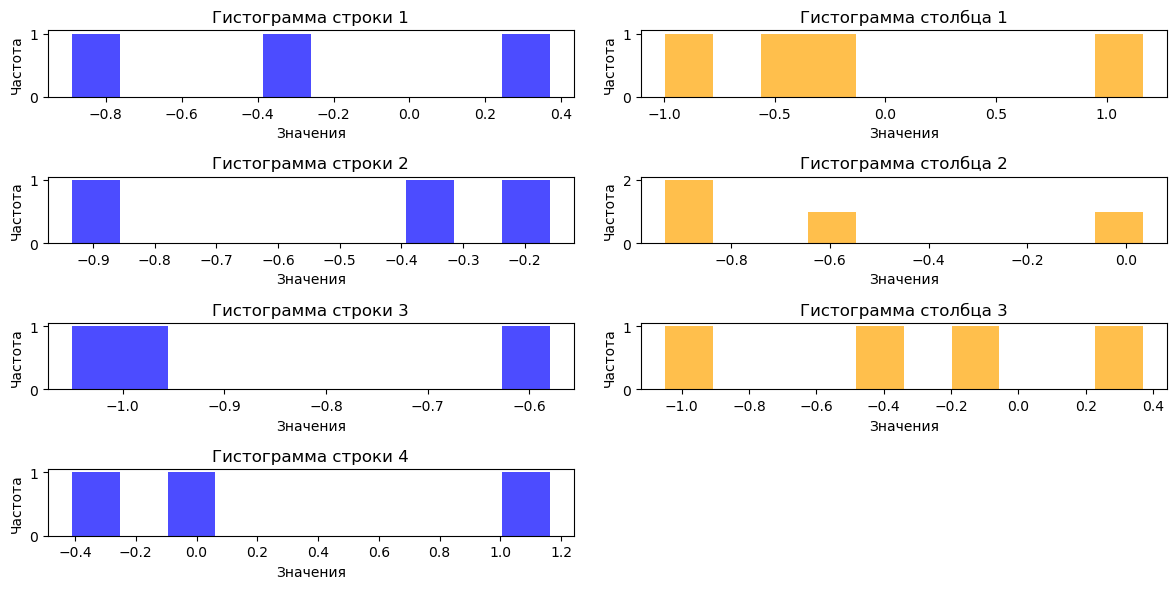

In [14]:

import matplotlib.pyplot as plt

def generate_matrix_and_analyze(m, n):
    # Генерация матрицы с размерами (m, n) со случайными числами, распределенными по нормальному закону
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))  # loc - среднее значение, scale - стандартное отклонение

    # Вычисление математического ожидания и дисперсии для каждой строки и столбца
    mean_rows = np.mean(matrix, axis=1)
    var_rows = np.var(matrix, axis=1)

    mean_columns = np.mean(matrix, axis=0)
    var_columns = np.var(matrix, axis=0)

    # Вывод результатов
    print("Математическое ожидание для строк:", mean_rows)
    print("Дисперсия для строк:", var_rows)
    print("Математическое ожидание для столбцов:", mean_columns)
    print("Дисперсия для столбцов:", var_columns)

    # Построение гистограмм для каждой строки
    plt.figure(figsize=(12, 6))
    for i in range(m):
        plt.subplot(m, 2, i * 2 + 1)
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Гистограмма строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')

    # Построение гистограмм для каждого столбца
    for j in range(n):
        plt.subplot(m, 2, j * 2 + 2)
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='orange')
        plt.title(f'Гистограмма столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Пример использования функции
generate_matrix_and_analyze(4, 3)  # Генерация матрицы 4x3


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    # Создаем матрицу размером (m, n) и заполняем её значениями a и b в шахматном порядке
    matrix = [[0] * n for _ in range(m)]
    for i in range(m):
        for j in range(n):
            # Если сумма индексов четная, ставим a, иначе b
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    return matrix

# Тесты для функции chess
def test_chess():
    # Тест 1: Простой случай 2x2
    result1 = chess(2, 2, 1, 0)
    expected1 = [[1, 0], [0, 1]]
    assert result1 == expected1, f"Test 1 Failed: {result1} != {expected1}"

    # Тест 2: Простой случай 3x3
    result2 = chess(3, 3, 1, 0)
    expected2 = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]
    assert result2 == expected2, f"Test 2 Failed: {result2} != {expected2}"

    # Тест 3: Простой случай 3x4
    result3 = chess(3, 4, 2, 3)
    expected3 = [[2, 3, 2, 3], [3, 2, 3, 2], [2, 3, 2, 3]]
    assert result3 == expected3, f"Test 3 Failed: {result3} != {expected3}"

    # Тест 4: Простой случай 4x3
    result4 = chess(4, 3, 5, 6)
    expected4 = [[5, 6, 5], [6, 5, 6], [5, 6, 5], [6, 5, 6]]
    assert result4 == expected4, f"Test 4 Failed: {result4} != {expected4}"

    # Тест 5: Простой случай 1x1
    result5 = chess(1, 1, 7, 8)
    expected5 = [[7]]
    assert result5 == expected5, f"Test 5 Failed: {result5} != {expected5}"

    print("Все тесты пройдены!")

# Запуск тестов
test_chess()


Все тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [19]:

from PIL import Image, ImageDraw

def draw_rectangle(width, height, image_height, image_width, rectangle_color, background_color):
    """
    Рисует прямоугольник на изображении.
    
    :param width: Ширина прямоугольника
    :param height: Высота прямоугольника
    :param image_height: Высота изображения
    :param image_width: Ширина изображения
    :param rectangle_color: Цвет прямоугольника (RGB)
    :param background_color: Цвет фона (RGB)
    :return: Изображение с нарисованным прямоугольником
    """
    # Создаем изображение с заданным фоном
    image = Image.new("RGB", (image_width, image_height), background_color)
    draw = ImageDraw.Draw(image)

    # Рисуем прямоугольник
    draw.rectangle([0, 0, width, height], fill=rectangle_color)

    return image

def draw_ellipse(width, height, image_height, image_width, ellipse_color, background_color):
    """
    Рисует овал (эллипс) на изображении.
    
    :param width: Ширина овала
    :param height: Высота овала
    :param image_height: Высота изображения
    :param image_width: Ширина изображения
    :param ellipse_color: Цвет овала (RGB)
    :param background_color: Цвет фона (RGB)
    :return: Изображение с нарисованным овалом
    """
    # Создаем изображение с заданным фоном
    image = Image.new("RGB", (image_width, image_height), background_color)
    draw = ImageDraw.Draw(image)

    # Рисуем овал (эллипс)
    draw.ellipse([0, 0, width, height], fill=ellipse_color)

    return image

# Тесты для функций
def test_shapes():
    # Тест 1: Прямоугольник 100x50 на изображении 200x150 с белым фоном
    rectangle_image = draw_rectangle(100, 50, 150, 200, (255, 0, 0), (255, 255, 255))  # Красный прямоугольник на белом фоне
    rectangle_image.show()  # Показываем изображение

    # Тест 2: Овал 100x50 на изображении 200x150 с белым фоном
    ellipse_image = draw_ellipse(100, 50, 150, 200, (0, 255, 0), (255, 255, 255))  # Зеленый овал на белом фоне
    ellipse_image.show()  # Показываем изображение

    # Тест 3: Прямоугольник 200x100 на изображении 300x200 с черным фоном
    rectangle_image = draw_rectangle(200, 100, 200, 300, (0, 0, 255), (0, 0, 0))  # Синий прямоугольник на черном фоне
    rectangle_image.show()  # Показываем изображение

    # Тест 4: Овал 150x75 на изображении 300x200 с черным фоном
    ellipse_image = draw_ellipse(150, 75, 200, 300, (255, 255, 0), (0, 0, 0))  # Желтый овал на черном фоне
    ellipse_image.show()  # Показываем изображение

    print("Все тесты пройдены!")

# Запуск тестов
test_shapes()


 


Все тесты пройдены!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [20]:

from scipy.signal import argrelextrema

def analyze_time_series(data, p):
    # 1. Вычисление математического ожидания
    mean = np.mean(data)
    
    # 2. Вычисление дисперсии и стандартного отклонения
    variance = np.var(data)
    std_dev = np.std(data)
    
    # 3. Поиск локальных максимумов и минимумов
    # Для нахождения локальных экстремумов используем argrelextrema
    data = np.array(data)
    local_maxima = argrelextrema(data, np.greater)[0]
    local_minima = argrelextrema(data, np.less)[0]
    
    # 4. Вычисление скользящего среднего
    moving_average = np.convolve(data, np.ones(p)/p, mode='valid')
    
    return {
        "mean": mean,
        "variance": variance,
        "std_dev": std_dev,
        "local_maxima": local_maxima,
        "local_minima": local_minima,
        "moving_average": moving_average
    }

# Пример временного ряда
time_series = [1, 3, 2, 5, 4, 6, 5, 3, 4, 7, 8, 6, 5, 9, 10, 8, 7, 11, 12, 10]
window_size = 3

# Анализ временного ряда
result = analyze_time_series(time_series, window_size)

# Вывод результатов
print("Математическое ожидание:", result["mean"])
print("Дисперсия:", result["variance"])
print("Стандартное отклонение:", result["std_dev"])
print("Локальные максимумы:", result["local_maxima"])
print("Локальные минимумы:", result["local_minima"])
print("Скользящее среднее:", result["moving_average"])


Математическое ожидание: 6.3
Дисперсия: 9.01
Стандартное отклонение: 3.0016662039607267
Локальные максимумы: [ 1  3  5 10 14 18]
Локальные минимумы: [ 2  4  7 12 16]
Скользящее среднее: [ 2.          3.33333333  3.66666667  5.          5.          4.66666667
  4.          4.66666667  6.33333333  7.          6.33333333  6.66666667
  8.          9.          8.33333333  8.66666667 10.         11.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [21]:

def one_hot_encode(labels):
    # Находим максимальное значение метки, чтобы определить количество классов
    num_classes = np.max(labels) + 1  # +1, так как метки начинаются с 0
    # Создаем матрицу нулей размером (количество меток, количество классов)
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    # Заполняем матрицу, устанавливая 1 в нужные позиции
    one_hot_matrix[np.arange(len(labels)), labels] = 1
    return one_hot_matrix

# Пример использования функции
labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encode(labels)

print("One-hot encoding:")
print(one_hot_encoded)


One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
